# Sex and the City lines

'Beauty is fleeting but a rent-controlled apartment overlooking the park is forever' and other quotes from Sex and the City

# Table of contents
1. Data overview
2. Data cleaning
3. Characters with the largest number of lines
4. The 'Sex And The City' quotes search engine <br>
    4.1. Quotes about cities and places <br>
    4.2. Quotes about men and women <br>
    4.3. Quotes about food, fashion and lifestyle <br>
    4.4. Quotes about appearance <br>
    4.5. Quotes about relationships and emotions <br>
    4.6. Other quotes
5. Tokenization <br>
    5.1. Stop words <br>
    5.2. Stemming
6. Conclusions

## 1. Data overview

In [1]:
# import Python libraries
import pandas as pd
import numpy as np
import nltk
import matplotlib as plt
import seaborn as sns; sns.set()

In [2]:
# open the csv file
df = pd.read_csv('SATC_all_lines.csv')
df.head()

,Unnamed: 0,Season,Episode,Speaker,Line,date_job
0,0,1.0,1.0,Carrie,"Once upon a time, an English journalist came t...",NaN
1,1,1.0,1.0,Carrie,Elizabeth was attractive and bright.,NaN
2,2,1.0,1.0,Carrie,Right away she hooked up with one of the city'...,NaN
3,3,1.0,1.0,Tim,The question remains-- Is this really a compan...,NaN
4,4,1.0,1.0,Carrie,"Tim was 42, a well-liked and respected investm...",NaN


- <b> Season </b>: number 1-6
- <b> Episode </b>: number 1-20
- <b> Speaker </b>: name of the character
- <b> Line </b>: Sex and the City script

In [3]:
df.head()

,Unnamed: 0,Season,Episode,Speaker,Line,date_job
0,0,1.0,1.0,Carrie,"Once upon a time, an English journalist came t...",NaN
1,1,1.0,1.0,Carrie,Elizabeth was attractive and bright.,NaN
2,2,1.0,1.0,Carrie,Right away she hooked up with one of the city'...,NaN
3,3,1.0,1.0,Tim,The question remains-- Is this really a compan...,NaN
4,4,1.0,1.0,Carrie,"Tim was 42, a well-liked and respected investm...",NaN


In [4]:
# find length of longest string in Pandas dataframe
df['Line'].str.len().max()

719.0

In [5]:
# set column width in dataframe
pd.options.display.max_colwidth = 719

## 2. Data cleaning

In [6]:
df.loc[df['date_job'].notnull()]

,Unnamed: 0,Season,Episode,Speaker,Line,date_job
101,101,1.0,1.0,Miranda,"It's like that guy, Jeremiah, the poet.",x
218,218,1.0,1.0,Charlotte,Capote Duncan. He's supposedly some big shot in the publishing world.,x
368,1,1.0,2.0,Carrie,She was the date of Nick a fairly successful sports agent who once told her she had nice legs.,x
501,134,1.0,2.0,Carrie,"Barkley, a notorious modelizer was one of those SoHo wonders who maintained a fabulous lifestyle despite never having sold a single painting.",x
936,189,1.0,3.0,Carrie,Two espressos and a tiramisu later I had learned that Sean was the youngest of three brothers had his own investment firm and was about to move into an apartment he had just purchased.,x
...,...,...,...,...,...,...
30663,89,6.0,2.0,Smith,We'd like to get you started with a little amuse-bouche.,x
32917,450,6.0,6.0,Carrie,Gus Fiansent offered Smith a part of a model / hustler / junkie in his latest movie.,x
34050,63,6.0,9.0,Miranda,"So, Robert, you're a doctor for the Knicks?",x
35027,82,6.0,11.0,Robert,- I'm a doctor.,x


In [7]:
df['date_job'].value_counts()

x                             86
Date's job title mentioned     1
Broker                         1
Name: date_job, dtype: int64

In [8]:
# delete date_job column
del df['date_job']
df.head()

,Unnamed: 0,Season,Episode,Speaker,Line
0,0,1.0,1.0,Carrie,"Once upon a time, an English journalist came to New York."
1,1,1.0,1.0,Carrie,Elizabeth was attractive and bright.
2,2,1.0,1.0,Carrie,Right away she hooked up with one of the city's typically eligible bachelors.
3,3,1.0,1.0,Tim,The question remains-- Is this really a company we want to own?
4,4,1.0,1.0,Carrie,"Tim was 42, a well-liked and respected investment banker who made about two million a year."


In [9]:
# delete Unnamed: 0 column
del df['Unnamed: 0']
df.head()

,Season,Episode,Speaker,Line
0,1.0,1.0,Carrie,"Once upon a time, an English journalist came to New York."
1,1.0,1.0,Carrie,Elizabeth was attractive and bright.
2,1.0,1.0,Carrie,Right away she hooked up with one of the city's typically eligible bachelors.
3,1.0,1.0,Tim,The question remains-- Is this really a company we want to own?
4,1.0,1.0,Carrie,"Tim was 42, a well-liked and respected investment banker who made about two million a year."


## 3. Characters with the largest number of lines

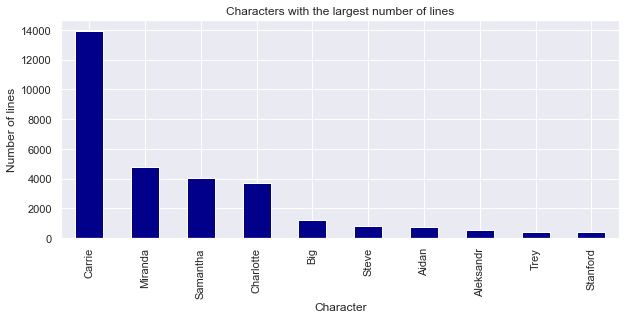

In [10]:
# show the most talkative characters in all six seasons
df['Speaker'].value_counts()[:10].plot.bar(figsize=(10,4), color='darkblue', xlabel = 'Character', ylabel = 'Number of lines', title='Characters with the largest number of lines');

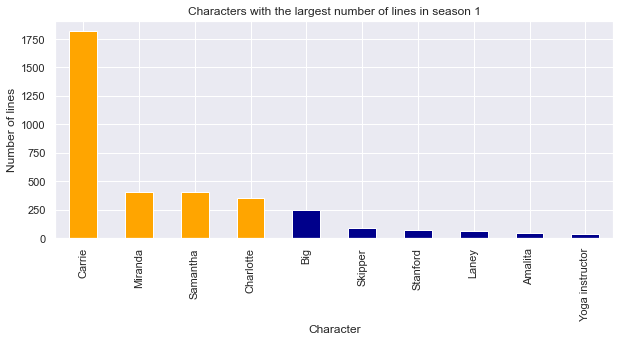

In [11]:
# show the most talkative characters in the first season
df['Speaker'].loc[df['Season']==1.0].value_counts()[:10].plot.bar(figsize=(10,4), color=['orange', 'orange', 'orange', 'orange', 'darkblue', 'darkblue', 'darkblue', 'darkblue', 'darkblue', 'darkblue'], xlabel = 'Character', ylabel = 'Number of lines', title='Characters with the largest number of lines in season 1');

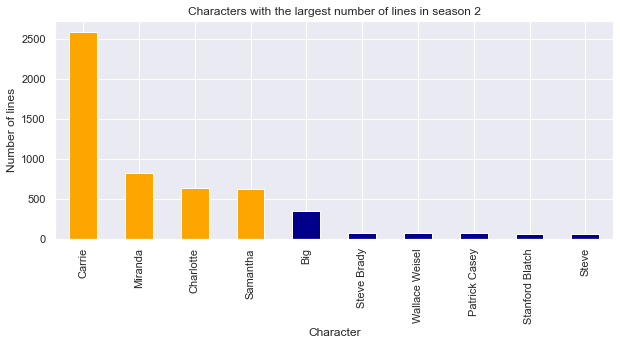

In [12]:
# show the most talkative characters in the second season
df['Speaker'].loc[df['Season']==2.0].value_counts()[:10].plot.bar(figsize=(10,4), color=['orange', 'orange', 'orange', 'orange', 'darkblue', 'darkblue', 'darkblue', 'darkblue', 'darkblue', 'darkblue'], xlabel = 'Character', ylabel = 'Number of lines', title='Characters with the largest number of lines in season 2');

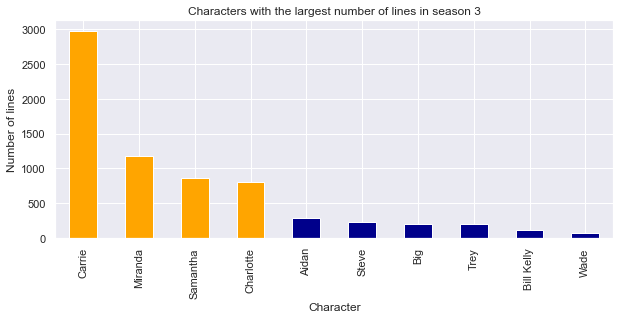

In [13]:
# show the most talkative characters in the third season
df['Speaker'].loc[df['Season']==3.0].value_counts()[:10].plot.bar(figsize=(10,4), color=['orange', 'orange', 'orange', 'orange', 'darkblue', 'darkblue', 'darkblue', 'darkblue', 'darkblue', 'darkblue'], xlabel = 'Character', ylabel = 'Number of lines', title='Characters with the largest number of lines in season 3');

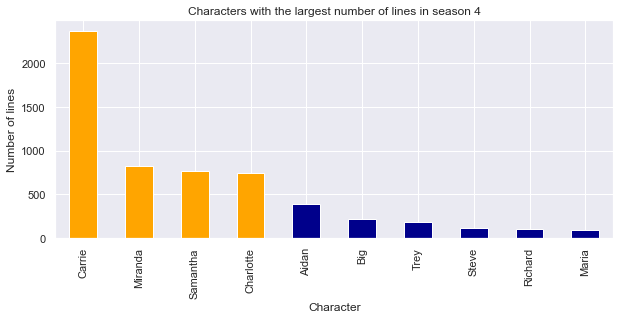

In [14]:
# show the most talkative characters in the fourth season
df['Speaker'].loc[df['Season']==4.0].value_counts()[:10].plot.bar(figsize=(10,4), color=['orange', 'orange', 'orange', 'orange', 'darkblue', 'darkblue', 'darkblue', 'darkblue', 'darkblue', 'darkblue'], xlabel = 'Character', ylabel = 'Number of lines', title='Characters with the largest number of lines in season 4');

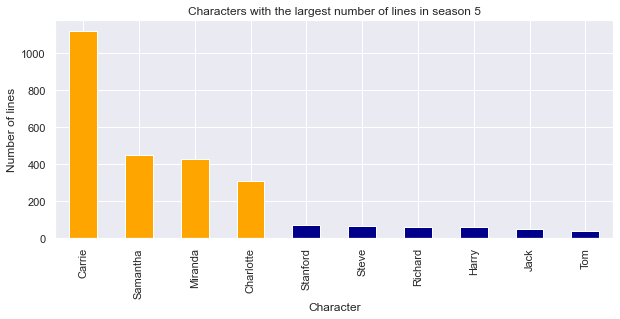

In [15]:
# show the most talkative characters in the fifth season
df['Speaker'].loc[df['Season']==5.0].value_counts()[:10].plot.bar(figsize=(10,4), color=['orange', 'orange', 'orange', 'orange', 'darkblue', 'darkblue', 'darkblue', 'darkblue', 'darkblue', 'darkblue'], xlabel = 'Character', ylabel = 'Number of lines', title='Characters with the largest number of lines in season 5');

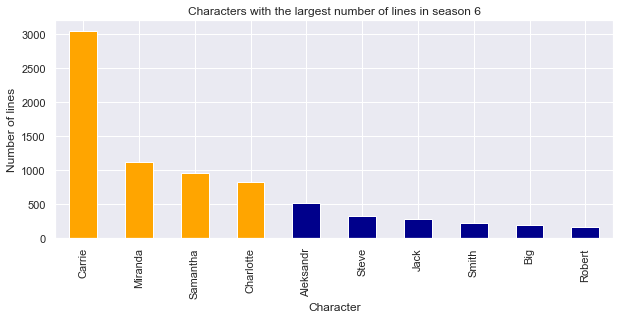

In [16]:
# show the most talkative characters in the sixth season
df['Speaker'].loc[df['Season']==6.0].value_counts()[:10].plot.bar(figsize=(10,4), color=['orange', 'orange', 'orange', 'orange', 'darkblue', 'darkblue', 'darkblue', 'darkblue', 'darkblue', 'darkblue'], xlabel = 'Character', ylabel = 'Number of lines', title='Characters with the largest number of lines in season 6');

## 4. The 'Sex And The City' quotes search engine

### 4.1. Quotes about cities and places

In [17]:
# find quotes about New York
df_ny = df.loc[df['Line'].str.contains('new york is', na=False, case=False)]
df_ny = df_ny[['Speaker', 'Line']]
df_ny.head(20)

,Speaker,Line
117,Stanford Blatch,I'm beginning to think the only place one can still find love and romance in New York is the gay community.
747,Carrie,One of the best things about living in a city like New York is leaving it.
1449,Carrie,The most powerful woman in New York is not Tina Brown or Diane Sawyer or even Rosie O'Donnell.
4065,Carrie,New York is a city filled with places to worship.
5696,Tom,The acting thing in New York is definitely not happening. I've a chance to get on a Christian soap opera if I move out West.
6892,Carrie,In a city as cynical as New York is it still possible to believe in love at first sight?
14873,Carrie,"One unfortunate thing about ending a relationship in a city like New York is while you can emotionally move away from each other, you physically can't."
21938,Carrie,New York is definitely haunted.
25219,Carrie,One of the best things about New York is that on any given night there are a million things to do.
25220,Carrie,One of the worst things about New York is trying to pick one.


In [18]:
# find quotes by Carrie about New York
df_carr_ny = df_ny.loc[df_ny['Speaker'] == 'Carrie'].head(20)
df_carr_ny

,Speaker,Line
747,Carrie,One of the best things about living in a city like New York is leaving it.
1449,Carrie,The most powerful woman in New York is not Tina Brown or Diane Sawyer or even Rosie O'Donnell.
4065,Carrie,New York is a city filled with places to worship.
6892,Carrie,In a city as cynical as New York is it still possible to believe in love at first sight?
14873,Carrie,"One unfortunate thing about ending a relationship in a city like New York is while you can emotionally move away from each other, you physically can't."
21938,Carrie,New York is definitely haunted.
25219,Carrie,One of the best things about New York is that on any given night there are a million things to do.
25220,Carrie,One of the worst things about New York is trying to pick one.
25878,Carrie,- I am not a buyer. New York is a town of renters. Everybody rents.
26869,Carrie,"But one of the most amazing things about living in New York is that any night, you can go to Paris."


In [19]:
# find quotes about Manhattan
df_manhattan = df.loc[df['Line'].str.contains('manhattan is', na=False, case=False)]
df_manhattan = df_manhattan[['Speaker', 'Line']]
df_manhattan.head(20)

,Speaker,Line
2163,Carrie,The island of Manhattan is a cozy village populated by more than seven million fascinating individuals
14346,Carrie,Manhattan is a place you can get anything anytime.
23701,Carrie,"For most New Yorkers, Manhattan is the center of the civilized world. But for a privileged few, Manhattan is merely a place to kill time between weekends at their fashionably rustic New York country homes."
32442,Samantha,All of Manhattan is here.
38071,Miranda,Why do I think living in Manhattan is so fantastic?


In [20]:
# find quotes about Central Park
df_cp = df.loc[df['Line'].str.contains('central park', na=False, case=False)]
df_cp = df_cp[['Speaker', 'Line']]
df_cp

,Speaker,Line
4181,Carrie,who lived in a brownstone between Central Park West and Columbus.
8848,Miranda,The elevator at the Marriott Marquis and a public restroom in Central Park.
11182,Carrie,"The next day in Central Park, Charlotte was making a new friend as well."
19488,Big,"Boathouse restaurant, Central Park."
26760,Big,Buggy ride in Central Park.
32154,Carrie,And in Central Park
33552,Carrie,And in Central Park a photographer attempted to catch two lovebirds sitting on a stone.
33559,Harry,"One might ask, how natural is it to be sitting in Central Park in a suit?"


In [21]:
# find quotes about Starbucks
df_starbucks = df.loc[df['Line'].str.contains('starbucks', na=False, case=False)]
df_starbucks = df_starbucks[['Speaker', 'Line']]
df_starbucks

,Speaker,Line
9687,Carrie,"They were everywhere: Movie theaters, restaurants, bookstores, hair salons Starbucks was basically a stroller parking lot."
18300,Carrie,Will O'Connor was a cute urban planner Miranda had met at Starbucks.
18345,Miranda,- Tell them to steer clear of Starbucks.
25138,Carrie,"I used to think those people who sat alone at Starbucks writing on their laptops were pretentious poseurs. Now, I know. They're people who have recently moved in with someone. As I Looked around I wondered how many of them were mid-fight like myself. The hard thing about fighting in relationships, as opposed to Madison Square Garden, no referee. There's no one to tell you which comments are below the belt or when to go to your separate corners. As a result, someone usually gets hurt. And it seems, the closer a couple gets and the more ''stuff'' they have between them, the harder it is to figure out exactly why they are yelling. When it comes to relationships I couldn't help but wonder what are we fighting ..."
28537,Stanford,Standing in line at Starbucks.
29511,Carrie,"We could put one in every neighborhood, like Starbucks."


In [22]:
# find quotes about Paris
df_paris = df.loc[df['Line'].str.contains('paris is', na=False, case=False)]
df_paris = df_paris[['Speaker', 'Line']]
df_paris

,Speaker,Line
27157,Charlotte,Carrie says the French film at The Paris is amazing.
38704,Aleksandr,- Paris is the best city in the world.
39913,Carrie,Paris is a mess. I never should have come here.


In [23]:
# find quotes about Venice
df_venice = df.loc[df['Line'].str.contains('venice', na=False, case=False)]
df_venice = df_venice[['Speaker', 'Line']]
df_venice

,Speaker,Line
1765,Carrie,I've never been to Venice.
1766,Mario,"Venice is the most beautiful, the most romantic city in the world."
1771,Carrie,"I'd parlay that $1,000 into a trip to Venice into a nice piece of jewelry a rich husband, f ollowed by a richer divorce."
1779,Carrie,Just because Venice was sinking didn't mean my morals had to go down with it.
29312,Samantha,"What, so, Miranda's like Venice?"


### 4.2. Quotes about men and women

In [24]:
# find quotes about women
df_women = df.loc[df['Line'].str.contains('women', na=False, case=False)]
df_women = df_women[['Speaker', 'Line']]
df_women.head(20)

,Speaker,Line
41,Carrie,"How the hell did we get into this mess? There are thousands, maybe tens of thousands of women like this in the city."
48,Carrie,Why are there so many great unmarried women and no great unmarried men? I explore these sorts of issues in my column and I have terrific sources: my friends.
49,Peter Mason,"When you're a young guy in your 20s, women are controlling the relationship."
50,Peter Mason,So by the time you're an eligible man in your 30s you feel like you're being devoured by women.
55,Capote Duncan,I think these women should just forget about marriage and have a good time.
61,Charlotte,Most men are threatened by successful women.
66,Peter Mason,Older women don't want to settle for what's available.
69,Capote Duncan,What women really want is Alec Baldwin.
74,Peter Mason,"Why don't these women just marry a fat guy? Why don't they just marry a big, fat tub of lard?"
93,Samantha,"Sweetheart, this is the first time in the history of Manhattan that women have had as much money and power as men plus the equal luxury of treating men like sex objects."


In [25]:
# find quotes by Carrie about women
df_carr_women = df_women.loc[df_women['Speaker'] == 'Carrie'].head(20)
df_carr_women

,Speaker,Line
41,Carrie,"How the hell did we get into this mess? There are thousands, maybe tens of thousands of women like this in the city."
48,Carrie,Why are there so many great unmarried women and no great unmarried men? I explore these sorts of issues in my column and I have terrific sources: my friends.
110,Carrie,So you think it's really possible to pull off this whole women-having-sex-like-men thing?
116,Carrie,Was it true? Were women in New York really giving up on love and throttling up on power? What a tempting thought.
273,Carrie,"Did all men secretly want their women promiscuous and emotionally detached? And if I was really having sex like a man, why didn't I feel more in control?"
349,Carrie,""" Right now I'm researching an article about women who have sex like men."
436,Carrie,"Modelizers are obsessed not with women, but with models who in most cities are safely confined to billboards and magazines but in Manhattan, actually run wild on the streets turning the city into a virtual Model Country Safari where men can pet the creatures in their natural habitat."
470,Carrie,I find it fascinating that four beautiful flesh and blood women could be intimidated by some unreal fantasy.
478,Carrie,"If models could cause otherwise rational individuals to crumble in their presence, exactly how powerful was beauty? There are two types of guys that fall for beautiful women."
621,Carrie,And probably others just have a thing for exceptionally beautiful women.


In [26]:
# find quotes about men
df_men = df.loc[df['Line'].str.contains('men', na=False, case=False)]
df_men = df_men[['Speaker', 'Line']]
df_men.head(20)

,Speaker,Line
4,Carrie,"Tim was 42, a well-liked and respected investment banker who made about two million a year."
41,Carrie,"How the hell did we get into this mess? There are thousands, maybe tens of thousands of women like this in the city."
48,Carrie,Why are there so many great unmarried women and no great unmarried men? I explore these sorts of issues in my column and I have terrific sources: my friends.
49,Peter Mason,"When you're a young guy in your 20s, women are controlling the relationship."
50,Peter Mason,So by the time you're an eligible man in your 30s you feel like you're being devoured by women.
55,Capote Duncan,I think these women should just forget about marriage and have a good time.
60,Miranda,Trust me-- this is not a story that makes men feel bad.
61,Charlotte,Most men are threatened by successful women.
66,Peter Mason,Older women don't want to settle for what's available.
69,Capote Duncan,What women really want is Alec Baldwin.


In [27]:
# find quotes by Carrie about men
df_carr_men = df_men.loc[df_men['Speaker'] == 'Carrie'].head(20)
df_carr_men

,Speaker,Line
4,Carrie,"Tim was 42, a well-liked and respected investment banker who made about two million a year."
41,Carrie,"How the hell did we get into this mess? There are thousands, maybe tens of thousands of women like this in the city."
48,Carrie,Why are there so many great unmarried women and no great unmarried men? I explore these sorts of issues in my column and I have terrific sources: my friends.
110,Carrie,So you think it's really possible to pull off this whole women-having-sex-like-men thing?
116,Carrie,Was it true? Were women in New York really giving up on love and throttling up on power? What a tempting thought.
120,Carrie,"He owned a talent agency and, at the moment, was down to a single client."
142,Carrie,"However, I did have a little experiment in mind."
166,Carrie,Kurt was just like I remembered-- better-- because this time there would be none of that messy emotional attachment.
211,Carrie,She'd think he was mocking her with his sweet nature and decide he was an asshole the way she had decided all men were assholes.
273,Carrie,"Did all men secretly want their women promiscuous and emotionally detached? And if I was really having sex like a man, why didn't I feel more in control?"


In [28]:
# find quotes about the right guy
df_guy = df.loc[df['Line'].str.contains('the right guy', na=False, case=False)]
df_guy = df_guy[['Speaker', 'Line']]
df_guy

,Speaker,Line
106,Carrie,"Believe me the right guy comes along, and you two here, this whole thing-- - right out the window."
108,Samantha,Listen to me! The right guy is an illusion.
1315,Samantha,"Look, I'm just saying, with the right guy and right lubricant-- What was that? A preview."
2208,Carrie,"Well, it’s not my favorite thing on the menu but, you know, I’ll order it from time to time. And, with the right guy, it can be nice."
12035,Samantha,Sometimes with the right guy you have to make concessions.
32593,Charlotte,None of that matters with the right guy.
35735,Miranda,I always thought that when the right guy came along all of my bullshit will calm down


In [29]:
# find quotes about gay men
df_gay = df.loc[df['Line'].str.contains('gay men', na=False, case=False)]
df_gay = df_gay[['Speaker', 'Line']]
df_gay

,Speaker,Line
8377,Carrie,"This is a city where gay men are so out, they're in where women are so chronically single, ovaries may be the next vestigial organ."
25262,Carrie,"Because gay men have the possibility of sex at the gym. If straight men had that they'd be working out all the time, too."
25450,Samantha,"That's because gay men understand what's important. Clothes, compliments, and Cocks. And clubs."
25526,Carrie,Turns out there's one problem with having a handsome gay man as your date. Other handsome gay men.


In [30]:
# find quotes about lesbians
df_lesbian = df.loc[df['Line'].str.contains('lesbian', na=False, case=False)]
df_lesbian = df_lesbian[['Speaker', 'Line']]
df_lesbian

,Speaker,Line
906,Miranda,I'm determined to make partner in this firm even if I have to be a lesbian partner.
952,Carrie,On the East Side a pseudo-lesbian couple attended a right-wing Republican dinner party.
1039,Chip,"In fact, we're not even really lesbians."
1047,Chip,She was looking to add a lesbian couple to our circle.
2468,Miranda,It's just this guy's cheap ploy to watch you be a lesbian for a night.
6369,Carrie,"But tonight's opening at Charlotte's gallery for Yael a lesbian painter from Brooklyn Heights actually transcended the bad wine, stale cheese routine."
6370,Carrie,It was lesbian chic meets art-world cool.
6379,Carrie,What did you expect? It's a lesbian art show.
6407,Carrie,"By midnight, Charlotte discovered Manhattan 's latest group to flaunt their disposable income: The power lesbian."
6493,Carrie,Power lesbians and their shoes are like Wall Street brokers and their cigars.


### 4.3. Quotes about food, fashion and lifestyle

In [31]:
# find quotes about Cosmopolitan
df_cosmo = df.loc[df['Line'].str.contains('cosmopolitan', na=False, case=False)]
df_cosmo = df_cosmo[['Speaker', 'Line']]
df_cosmo

,Speaker,Line
2261,Carrie,"That afternoon I dragged my poor, tortured soul out to lunch with Stanford Blach and attempted to stun it senseless with cosmopolitans."
2370,Carrie,Cosmopolitan.
7047,Samantha,"Another Cosmopolitan, please."
7209,Carrie,"Samantha, a Cosmopolitan and Donald Trump."
7947,Carrie,"He can make you cum, then make you a Cosmopolitan."
8590,Sexy Waiter,"Three Cosmopolitans, a Diet Coke, and a vodka Martini with a twist."
8816,Carrie,"Even through my Cosmopolitan haze, I knew I had gone too far."
9941,Samantha,- Cosmopolitan.
10649,Laurel Harris,"-I'll get it. Cosmopolitan, right?"
10652,Carrie,A 25-year-old virgin was getting me a Cosmopolitan.


In [32]:
# find quotes about coffee
df_coffee = df.loc[df['Line'].str.contains('coffee', na=False, case=False)]
df_coffee = df_coffee[['Speaker', 'Line']]
df_coffee.head(20)

,Speaker,Line
31,Carrie,- She told me one day over coffee.
187,Carrie,"Later that night, Skipper met me for coffee and confessed a shocking intimate secret."
629,Carrie,"My cute stories?About half the time I'm at my apartment, and the other half I'm over at this coffee shop on 73rd and Madison."
767,Carrie,- Great! I only knew one thing-- that's way too much Peter before coffee.
941,Carrie,It was then I realized I was having coffee with the marrying guy.
1391,Carrie,- Coffee.
1392,Carrie,I need coffee.
1401,Carrie,You don't have any coffee-- - You don't have any coffee filters.
1405,Carrie,"You, coffee."
1407,Sam,"That would make a kick-ass song, wouldn't it? Unicorn woman Coffee."


In [33]:
# find quotes about the Birkin bag
df_birkin = df.loc[df['Line'].str.contains('birkin', na=False, case=False)]
df_birkin = df_birkin[['Speaker', 'Line']]
df_birkin

,Speaker,Line
24404,Carrie,- The Birkin bag? Really? That's not even your style.
24409,Samantha,"- Byebye, Birkin."
24455,Hermes Clerk,It’s not a bag. It’s a Birkin.
24465,Samantha,"Hello. Francesca? Samantha Jones. Question. How the fuck long does Lucy Liu have to wait for that Birkin? If they're so hard to get, maybe you can explain why I just saw a fucking nobody in a track suit carrying the exact one we want! Lucy Liu is a big big fucking star, and she wants that bag! Is ''Hermès'' French for ''We take our good old fucking time''? Thank you so much."
24555,Samantha,Birkin.
24569,Samantha,That's my fucking Birkin!


In [34]:
# find quotes about shoes
df_sh = df.loc[df['Line'].str.contains('shoes', na=False, case=False)]
df_sh = df_sh[['Speaker', 'Line']]
df_sh.head(20)

,Speaker,Line
1346,Carrie,I walked 48 blocks in four-hundred-dollar shoes.
1413,Carrie,Shoes.
1512,Amalita,"Now take the shoes, and we'll talk soon."
1566,Carrie,But I rationalized that my new shoes shouldn't be punished just because I can't budget.
2931,Miranda,Please! Think about the money we spend on shoes.
3082,Stanford,Who else would keep you in expensive shoes and encourage you to cheat?
5071,Charlotte,He's eaten four pairs of shoes.
5365,Ben,"Last month, I went out with a woman who slept with her shoes on."
6052,Miranda,I have a lot of shoes.
6353,Big,You know what my version of hell is? Wearing rented two-tone shoes.


In [35]:
# find quotes about Manolo Blahnik shoes
df_ma = df.loc[df['Line'].str.contains('manolo', na=False, case=False)]
df_ma = df_ma[['Speaker', 'Line']]
df_ma

,Speaker,Line
45,Carrie,They'll spend $400 on a pair of Manolo Blahnik strappy sandals.
12448,Carrie,"Later that week, I had a religious experience at Manolo Blahnik."
13582,Carrie,"My list includes: the perfect apartment, the chocolate souffle at Le Bernardin, and the annual Manolo Blahnik sale."
18933,mugging man,- And your Manolo Blahniks.
20147,Carrie,With no true soul mate I spent the afternoon with my shoe soul mate Manolo Blahnik.
26117,Carrie,"It wasn't quite as easy as clicking my Manolo Blahniks three times, but it was worth it. I was home."
26417,Carrie,Manolo Blahnik Mary Janes. I thought these were an urban shoe myth.
34119,Carrie,They were Manolos.
34125,Carrie,These were new Manolos.
34275,Carrie,You know how much Manolos are.


In [36]:
# find quotes about closet
df_closet = df.loc[df['Line'].str.contains('closet ', na=False, case=False)]
df_closet = df_closet[['Speaker', 'Line']]
df_closet

,Speaker,Line
1619,Carrie,"The next morning I was brought back down to Earth as I confronted that eternal puzzle a closet full of clothes, nothing to wear."
4084,Carrie,I'm doing a column on closet Presbyterians. You know any?
12440,Carrie,"Samantha smiled, but a woman with a goodie-closet doesn't need to pay for head."
24094,Carrie,Seriously. Keeping my relationship with Big in the closet only makes things worse.
33104,Carrie,"Meanwhile, in another closet"


### 4.4. Quotes about appearance

In [37]:
# find quotes about beauty
df_bea = df.loc[df['Line'].str.contains('beauty', na=False, case=False)]
df_bea = df_bea[['Speaker', 'Line']]
df_bea.head(20)

,Speaker,Line
244,Skipper,"But if you're not part of the ""Beauty Olympics"" you can still become a very interesting person."
451,Miranda,We should just admit that we live in a culture that promotes impossible standards of beauty.
478,Carrie,"If models could cause otherwise rational individuals to crumble in their presence, exactly how powerful was beauty? There are two types of guys that fall for beautiful women."
513,Barkley,Beauty.
590,Carrie,Samantha Jones never missed a major fashion show.She was one of the only people I knew who thought that proximity to beauty made her feel more attractive.
656,Carrie,I wondered if there wasn't some kind of physics for beauty.
746,Carrie,Beauty is fleeting but a rent-controlled apartment overlooking the park is forever.
1726,Neville,The source of all lif e and pleasure and beauty.
3046,Carrie,"I love Sleeping Beauty! The music, the sex, the costumes!"
7215,Ed,I was so distracted by your beauty I think I just agreed to finance Mr.


In [38]:
# find quotes with the definition of beauty
df_be = df.loc[df['Line'].str.contains('beauty is', na=False, case=False)]
df_be = df_be[['Speaker', 'Line']]
df_be

,Speaker,Line
746,Carrie,Beauty is fleeting but a rent-controlled apartment overlooking the park is forever.


In [39]:
# find quotes with the definiton of being sexy
df_sexy = df.loc[df['Line'].str.contains('sexy is', na=False, case=False)]
df_sexy = df_sexy[['Speaker', 'Line']]
df_sexy.head(20)

,Speaker,Line
20385,Miranda,"Sexy is the thing I try to get them to see me as, after I win them over with my personality."


In [40]:
# find quotes about the good looking
df_goodlook = df.loc[df['Line'].str.contains('good-looking', na=False, case=False)]
df_goodlook = df_goodlook[['Speaker', 'Line']]
df_goodlook

,Speaker,Line
73,Miranda,They are just as self-centered and unappreciative as the good-looking ones.
83,Carrie,A public relations executive she routinely slept with good-looking guys in their 20s.
278,Samantha,"He usually dates models, but, hey, I'm as good-looking as a model plus I own my own business."
10713,Samantha,"Good-looking, polite, house in the Hamptons."
10767,Laurel Harris,...wagging one's pussy at every good-looking stud who walks by?
10874,Carrie,"He's good on paper, probably like Natasha. Good-looking, sweet, blah-blah-blah."
11792,Samantha,"- He's good-looking, he's got power It's got to be a turn-on."
11805,Samantha,The country runs better with a good-looking man in charge Look at Nixon.
12834,Carrie,"If there was this good-looking guy walking towards you and across the street was a beautiful girl, which one ."
19010,Miranda,He's too good-looking for me.


In [41]:
# find quotes about braces
df_braces = df.loc[df['Line'].str.contains('braces', na=False, case=False)]
df_braces = df_braces[['Speaker', 'Line']]
df_braces

,Speaker,Line
18041,Miranda,"I'm a 34-year-old with braces, and I'm on a liquid diet."
18062,Miranda,"I'm sorry, are your braces blue?"
18070,Miranda,Her braces are sapphire.
18104,Carrie,If the guy's worth dating he won't care about your braces.
18107,Carrie,"He'd smile, and he'd have braces too."
18108,Miranda,"But the sick thing is, I would never date a guy with braces."
18219,Miranda,You think I'm funny? You think it's hilarious that I have braces? Let's take a moment and have a good laugh.
18223,Carrie,"The next day, she had her braces removed and resumed her life as a 34-year-old tongue-thruster."
32797,Elaine,Never had braces. Can you imagine?


### 4.5. Quotes about relationships and emotions

In [42]:
# find quotes about the real love
df_reallove = df.loc[df['Line'].str.contains('real love', na=False, case=False)]
df_reallove = df_reallove[['Speaker', 'Line']]
df_reallove

,Speaker,Line
39895,Carrie,"Real love. Ridiculous, inconvenient,"


In [43]:
# find quotes about love
df_love = df.loc[df['Line'].str.contains('love is', na=False, case=False)]
df_love = df_love[['Speaker', 'Line']]
df_love

,Speaker,Line
6948,Big,"""Love is like a dove ""Or big fuzzy glove"" Don't use that."
14631,Charlotte,- I can't believe that love is random.
26723,Eric,"Love is tricky. I mean, it's just so hard to see clearly through it."
27610,Audio Casette,What is not love is fear.
27754,Dr. Grayson,Only love is real.
31671,Carrie,One of the signs that a female gorilla is in love is that she can be seen picking nits off her male companion.
34942,Carrie,But it's good to remember love is possible.
39898,Carrie,that love is here in...


In [44]:
# find quotes about relationship
df_re = df.loc[df['Line'].str.contains('relationship', na=False, case=False)]
df_re = df_re[['Speaker', 'Line']]
df_re.head(20)

,Speaker,Line
49,Peter Mason,"When you're a young guy in your 20s, women are controlling the relationship."
79,Samantha,"Look. If you're a successful single woman in this city, you have two choices: You can bang your head against the wall and try and find a relationship or you can say ""screw it,"" and just go out and have sex like a man."
95,Miranda,"I mean, they don't want to be in a relationship with you but as soon as you only want them for sex, they don't like it."
122,Stanford Blatch,"How could I possibly sustain a relationship? You know Derek takes up like, a thousand percent of my time."
259,Kurt Harrington,"Yeah. Then I thought, how great! You finally understand the kind of relationship I want and now we can have sex without commitment."
1352,Carrie,"Meanwhile uptown, Charlotte wondered when relationships had gotten so complicated."
1890,Carrie,"Three prior serious relationships, none resulting in marriage."
2106,Charlotte,When you sleep with a man on the first date the relationship will never be anything more than just sex.
2245,Water boy,"I’ve been involved in a monogamous relationship for over a year now. It’s been wonderfully fulfilling. Of course, my definition of monogamy includes sex with prostitutes."
2381,Miranda,"Yeah, that’s exactly what it is, crazy. Listen, Skipper, I’m not ready for a full-blown relationship thing."


In [45]:
# find quotes about the ex
df_ex = df.loc[df['Line'].str.contains(' an ex ', na=False, case=False)]
df_ex = df_ex[['Speaker', 'Line']]
df_ex.head(20)

,Speaker,Line
4621,Carrie,"Was Charlotte right? Were we supposed to get over an ex in a slow, painful way? Or should we ignore all the bad feelings and throw ourselves back in the game?"
11102,Carrie,You try to be friendly with an ex and you wind up knee-deep in shit! Perfect.
12110,Woman at party,"Yeah, an ex girlfriend, right?"
21777,Cashier,Nothing's more frightening than the prospect of seeing an ex before you've had your morning coffee.
26580,Samantha,Sex with an ex can be depressing.


In [46]:
# find quotes about a husband
df_husband = df.loc[df['Line'].str.contains('a husband', na=False, case=False)]
df_husband = df_husband[['Speaker', 'Line']]
df_husband

,Speaker,Line
8380,Carrie,Who needs a husband when you have a doorman? Are New Yorkers evolving past relationships?
14003,Miranda,"""Marriage lncorporated: ""Howto apply successful business strategies to finding a husband""."
14015,Carrie,"That evening, as Charlotte began her new career as a husband-hunter, Miranda returned home to feather her stress-free love nest."
19205,Charlotte,I don't want a husband who looks the other way.
19206,Charlotte,I want a husband who makes me not want to kiss the gardener.
22872,Charlotte,""" There's nothing wrong with having a husband!"
38792,Carrie,Especially a husband.


In [47]:
# find quotes about marriage
df_mar = df.loc[df['Line'].str.contains('marriage', na=False, case=False)]
df_mar = df_mar[['Speaker', 'Line']]
df_mar.head(20)

,Speaker,Line
55,Capote Duncan,I think these women should just forget about marriage and have a good time.
805,Carrie,Charlotte treated marriage like a sorority she was hoping to pledge.
942,Carrie,That elusive and rare Manhattan man whose sights were set on marriage.
1005,Charlotte,No guy buys a classic six on the Upper West Side unless they are seriously thinking about marriage.
1102,Carrie,As I sifted through the rubble of my marriage skirmish I had a thought.
1890,Carrie,"Three prior serious relationships, none resulting in marriage."
2759,Ruth,"Whatever it takes, I'll keep this marriage together."
2764,Ruth,"Exactly! And if being sexually adventuresome will keep this marriage together, then I am prepared to join you with him in bed."
2904,Carrie,I wasn't thinking about marriage until he told me to think about it. Now it's all I think about.
2984,Carrie,"Just back from her honeymoon, she was all business: the business of marriage."


In [48]:
# find quotes with the definition of marriage
df_marr = df.loc[df['Line'].str.contains('marriage is', na=False, case=False)]
df_marr = df_marr[['Speaker', 'Line']]
df_marr

,Speaker,Line
15547,Charlotte,Marriage is supposed to be about love and happiness.
17641,Charlotte,- My marriage is a fake Fendi.
19207,Trey,No marriage is perfect.
19839,Charlotte,"We love each other so much but that doesn't always mean a marriage is working, does it? It does not."


In [49]:
# find quotes about getting married
df_married = df.loc[df['Line'].str.contains('get married', na=False, case=False)]
df_married = df_married[['Speaker', 'Line']]
df_married.head(20)

,Speaker,Line
54,Capote Duncan,"I mean, if you want to get married, it's to have kids, right? Not with someone older than 35, 'cause you have to have kids right away and that's about it."
820,Single woman1,"When women get married, they forget who they are."
828,Married woman1,"Some people, like me, choose to grow up face reality and get married."
926,David,"But you do want to get married someday, right? I don't know."
1081,Carrie,You obviously want to get married and I don't know what I want.
1087,Sean,"All I hear is ""I want to get married."
1090,Sean,I just want to get married.
2880,Big,Why do people get married if they're not in love?
2883,Carrie,- Why did you get married?
2897,Carrie,could I date a man who would never get married?


In [50]:
# find quotes about friendship
df_fr = df.loc[df['Line'].str.contains('friendship', na=False, case=False)]
df_fr = df_fr[['Speaker', 'Line']]
df_fr.head(20)

,Speaker,Line
2217,Carrie,"A few hours and a couple of bottles later, vows of friendship renewed, we were almost out the door when…"
8077,Carrie,an Upper East Side hostess famous for her husband's money and a close friendship with Tina Brown.
8078,Carrie,I knew her 10 years ago when she was famous for her father's money and a close friendship with her drug dealer.
9661,Carrie,"I refused to believe that a passionate sexual connection could not be translated into a meaningful friendship, at the very least."
10908,Samantha,"Women are for friendships, men are for fucking."
10910,Charlotte,"Friendship is the bonus of a relationship. If they don’t want relationship, they don’t get to be friends."
10911,Carrie,"So what? If you don’t make it a couple, you withhold friendship as a punishment?"
10914,Samantha,Withholding friendship is letting them off easy.
10939,Carrie,But what's really unknown is: what plus what equals friendship with an ex?
10942,Carrie,...into something that fits nice and easily onto the friendship shelf?


In [51]:
# find quotes about being single
df_si = df.loc[df['Line'].str.contains('single', na=False, case=False)]
df_si = df_si[['Speaker', 'Line']]
df_si.head(20)

,Speaker,Line
79,Samantha,"Look. If you're a successful single woman in this city, you have two choices: You can bang your head against the wall and try and find a relationship or you can say ""screw it,"" and just go out and have sex like a man."
120,Carrie,"He owned a talent agency and, at the moment, was down to a single client."
445,Carrie,There's nothing like raising the subject of models among four single women to spice up an otherwise dull Tuesday night.
501,Carrie,"Barkley, a notorious modelizer was one of those SoHo wonders who maintained a fabulous lifestyle despite never having sold a single painting."
567,Carrie,"""The Bone"" was the world's biggest underwear model and Stanf ord's most important client as well as the subject of his single-minded obsession."
759,Carrie,Single people give married friends tidbits from their sexual escapades.
794,Carrie,I'm single.
795,Miranda,"And what? Single women prowl beach houses hoping for glimpses of their friends' husbands' dicks? - How good a friend was she? - What's the diff erence? When someone gets married, all bets are off."
797,Carrie,As the only single lawyer working at her law firm Miranda had given this topic some thought.
803,Samantha,"If you're still single, you are not to be trusted."


In [52]:
# find quotes about cheating
df_cheat = df.loc[df['Line'].str.contains('cheat ', na=False, case=False)]
df_cheat = df_cheat[['Speaker', 'Line']]
df_cheat

,Speaker,Line
6431,Samantha,Men cheat for the same reason that dogs lick their balls: Because they can.
23092,Miranda,Just because you cheated on him does not mean he would cheat on you.
26173,Samantha,- He doesn’t wanna be monogamous. He'll cheat with or without me.
27488,Carrie,"A canary diamond, ""I'll try not to cheat and eat when I'm scared"" ring."


In [53]:
# find quotes about dating
df_da = df.loc[df['Line'].str.contains('dating', na=False, case=False)]
df_da = df_da[['Speaker', 'Line']]
df_da.head(20)

,Speaker,Line
434,Miranda,"If men like Nick are dating models, what chance do ordinary women have? Do you have to be a supermodel to get a date in New York? Modelizers are a particular breed."
473,Carrie,Is this really intimidating to any of you? -
601,Samantha,You're not dating him?
603,Samantha,Is he dating any one model in particular?
619,Big,Only that they're very lucky.So what have you discovered about these men who are dating models?
1004,Carrie,I've been dating him a week and a half.
1021,Patience,"When Sean told us you and he were dating, we were so thrilled."
1109,Carrie,It was almost as if they were dating accidentally.
1139,Miranda,- We're not dating.
1248,Carrie,Shouldn't we be dating men our own age? Good luck finding one.


In [54]:
# find quotes about romantic
df_rom = df.loc[df['Line'].str.contains('romantic', na=False, case=False)]
df_rom = df_rom[['Speaker', 'Line']]
df_rom.head(20)

,Speaker,Line
15,Carrie,For two weeks they snuggled went to romantic restaurants had wonderful sex and shared their most intimate secrets.
193,Skipper,"I'm too nice, you know? I'm a romantic."
1645,Carrie,Later I spent the most incredibly romantic afternoon with Gilles.
1766,Mario,"Venice is the most beautiful, the most romantic city in the world."
2495,Miranda,- That's romantic.
3047,Carrie,It's so romantic!
5842,Carrie,Tartini! While Stanford and I did downtown Samantha was uptown waiting for William at her favorite romantic restaurant.
6037,Charlotte,It's kind of romantic.
6154,Carrie,"But on Ned, it only made him more romantic."
7066,Carrie,It was all so romantic.


In [55]:
# find quotes about sex
df_sex = df.loc[df['Line'].str.contains('sex ', na=False, case=False)]
df_sex = df_sex[['Speaker', 'Line']]
df_sex.head(20)

,Speaker,Line
15,Carrie,For two weeks they snuggled went to romantic restaurants had wonderful sex and shared their most intimate secrets.
79,Samantha,"Look. If you're a successful single woman in this city, you have two choices: You can bang your head against the wall and try and find a relationship or you can say ""screw it,"" and just go out and have sex like a man."
86,Carrie,- Drew the sex god.
93,Samantha,"Sweetheart, this is the first time in the history of Manhattan that women have had as much money and power as men plus the equal luxury of treating men like sex objects."
102,Miranda,"I mean, the sex was incredible."
141,Carrie,"After all these years, I finally saw him for what he was: a self-centered, withholding creep who was still the best sex I ever had in my life."
177,Carrie,I'd just had sex like a man.
224,Carrie,I didn't tell her about my afternoon of cheap and easy sex and how good it felt.
259,Kurt Harrington,"Yeah. Then I thought, how great! You finally understand the kind of relationship I want and now we can have sex without commitment."
273,Carrie,"Did all men secretly want their women promiscuous and emotionally detached? And if I was really having sex like a man, why didn't I feel more in control?"


In [56]:
# find quotes with the defintion of sex
df_se = df.loc[df['Line'].str.contains('sex is', na=False, case=False)]
df_se = df_se[['Speaker', 'Line']]
df_se.head(20)

,Speaker,Line
1633,Carrie,"I have to get dressed, all right? Is it possible to be addicted to a person? The sex is so awesome that it's, like it's all I can think about."
1685,Samantha,Sex is power.
1686,Samantha,"Theref ore, getting money f or sex is simply an exchange of power."
1835,Samantha,"I mean, isn't it better to find out if the sex is good right offthe bat before anybody's feelings get hurt? -"
1926,Mike,"The thing is, she's smart, incredibly sweet, and sex is great."
2011,Samantha,"If the sex is good, who cares what anybody thinks?"
2209,Miranda,Oral sex is like god's gift to women; you can get off without worrying about getting pregnant.
3692,Samantha,sex is a barometer for what's going on in the relationship.
3748,Yoga instructor,The only thing hotter than sex is not having sex.
4239,Thomas John Anderson,and if God made the body and sex is an expression of that body...


In [57]:
# find quotes about being desperate
df_desp = df.loc[df['Line'].str.contains('desperate ', na=False, case=False)]
df_desp = df_desp[['Speaker', 'Line']]
df_desp

,Speaker,Line
819,Married woman1,They remind me of how desperate I used to be.
1985,Carrie,Samantha had a particular knack for turning a desperate situation into a hopeless one.
8494,Joseph,"Such as, what is all this reproductive technology doing for us? Do we want desperate women having babies at 50? Maybe some people aren't supposed to procreate."
15169,Miranda,Steve got a message from a girl desperate for him to go to a movie.
17963,Carrie,"She was desperate to turn his on, but didn't know where to find it."
18410,Carrie,I soon realized how many desperate New York women there were.
18543,Carrie,Will's death had turned Miranda into my target audience - a desperate woman.
18829,Carrie,I had let 300 desperate women and one asshole convince me that I didn't know anything.
22608,Carrie,"Miranda didn't answer her phone, so I left a desperate message and started to send her a desperate e-mail."
22633,Carrie,"When women do it, it's often considered desperate or psycho."


### 4.6. Other quotes

In [58]:
# find quotes about Donald Trump
df_trump = df.loc[df['Line'].str.contains('donald trump', na=False, case=False)]
df_trump = df_trump[['Speaker', 'Line']]
df_trump.head(20)

,Speaker,Line
274,Samantha,You see that guy? He's the next Donald Trump except he's younger and much better looking.
7209,Carrie,"Samantha, a Cosmopolitan and Donald Trump."
20026,Samantha,I can guarantee Donald Trump and Marlo Thomas.


In [59]:
# find quotes about beliefs
df_belief = df.loc[df['Line'].str.contains('belief', na=False, case=False)]
df_belief = df_belief[['Speaker', 'Line']]
df_belief

,Speaker,Line
4177,Carrie,shook Charlotte's beliefs to the core.
5631,Carrie,"And it's my personal belief, I lapsed into a coma."
7208,Carrie,Had the relationship God smiled? Or was that something I desperately needed to believe? Are we willing to believe anything to date? While Samantha had little belief in the idea of happily ever after she had a strong belief in the idea of a smart cocktail at the end of the work day.
7442,Carrie,Seeing Big show up for me shook Miranda's lack of belief system to the very core.
8721,Carrie,"In fact, it's a common belief that a relationship without pain is a relationship not worth having."
15059,Carrie,"It's a common belief that women use the left, emotional side of their brain and men the right, more logical side."
19980,Carrie,"A belief that someone, somewhere is holding the key to your heart, and your dream house."
27603,Carrie,"That night, I started to think about belief."
27606,Carrie,"Otherwise, how do you bounce back when reality batters your belief system and love does not, as promised, conquer all."
27701,Carrie,"That night, Charlotte dragged me to the fountain of belief."


In [60]:
# find quotes about money
df_mon = df.loc[df['Line'].str.contains('money', na=False, case=False)]
df_mon = df_mon[['Speaker', 'Line']]
df_mon.head(20)

,Speaker,Line
93,Samantha,"Sweetheart, this is the first time in the history of Manhattan that women have had as much money and power as men plus the equal luxury of treating men like sex objects."
1118,Carrie,"He had her big three: Iooks, manners, money."
1379,Carrie,"Who cares about age, crossword puzzles the cab money I'd left on the table? This felt so good, I'd do anything to keep this high."
1414,Carrie,A couple of blocks and way too much money later I realized I had just entered an interesting chapter in my life.
1529,Carrie,In an eff ort to save money and maybe even pick up a f ew extra bucks I invited the girls over f or poker.
1673,Carrie,Then he leaves me money.
1683,Miranda,"The room service is one thing, but the money-- uh-uh."
1684,Samantha,What are you getting so uptight about? Money is power.
1686,Samantha,"Theref ore, getting money f or sex is simply an exchange of power."
1696,Miranda,Do you ever have any conversations about money?


## 5. Tokenization

## 5.1. Stop words

In [61]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [63]:
# nltk.download('punkt')
from nltk.tokenize import word_tokenize

text = str(df.loc[0, 'Line'])

# random sentecnce with lot of stop words
text_tokens = word_tokenize(text)

tokens_without_sw = [word for word in text.split() if not word in stopwords.words('english')]

print('Text with stopwords: \n'+ str(text_tokens))
print('\nText without stopwords: \n'+ str(tokens_without_sw))

Text with stopwords: 
['Once', 'upon', 'a', 'time', ',', 'an', 'English', 'journalist', 'came', 'to', 'New', 'York', '.']

Text without stopwords: 
['Once', 'upon', 'time,', 'English', 'journalist', 'came', 'New', 'York.']


## 5.2. Stemming

## 6. Conclusions